In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Loading raw data

In [3]:
raw_data = pd.read_csv('used_device_data.csv')
raw_data

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


# Preprocessing 

### Exploring the descriptive statistics of the variable

In [6]:
raw_data.describe(include='all')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


In [7]:
data = raw_data.drop(['brand_name'],axis=1)

In [8]:
data.describe(include='all')

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


In [9]:
data.isnull().sum()

os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [10]:
data_no_mv = data.dropna(axis=0)

In [15]:
data_no_mv.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3253.000000,3253.000000,3253.00000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,13.617476,9.476354,6.09379,52.098632,3.962960,3074.926990,182.493637,2015.766370,695.695358,4.342386,5.217554
std,3.851520,4.802200,6.59958,85.442242,1.225895,1296.957619,90.359810,2.187719,235.454084,0.579414,0.671758
min,5.080000,0.080000,0.00000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.00000,16.000000,4.000000,2100.000000,140.450000,2014.000000,564.000000,4.019262,4.789157
50%,12.830000,8.000000,5.00000,32.000000,4.000000,3000.000000,158.000000,2015.000000,705.000000,4.377642,5.242223
75%,15.320000,13.000000,8.00000,64.000000,4.000000,3950.000000,182.000000,2018.000000,879.000000,4.725616,5.638070
max,30.710000,48.000000,32.00000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [69]:
data_no_mv.duplicated().sum()

0

## Exploring the PDFs

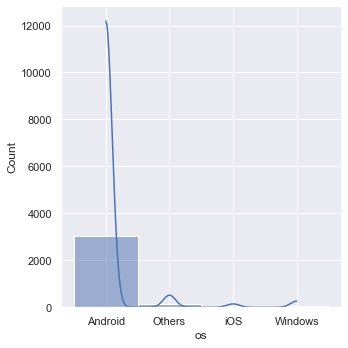

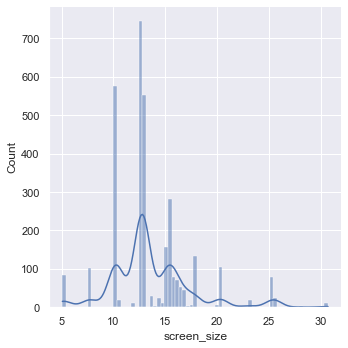

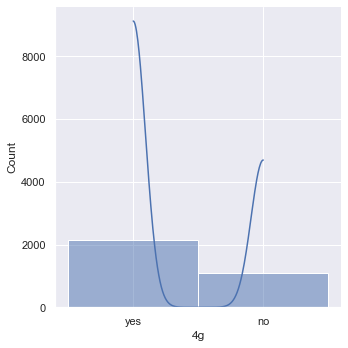

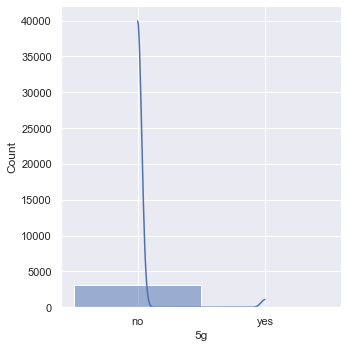

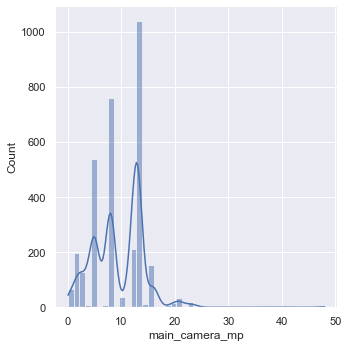

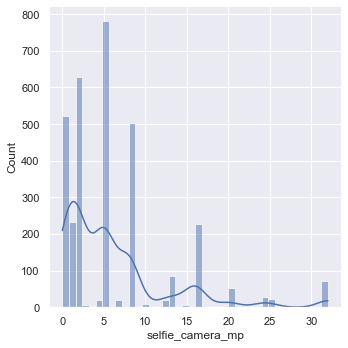

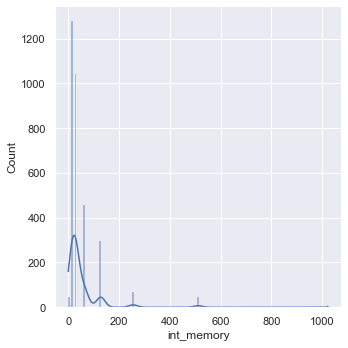

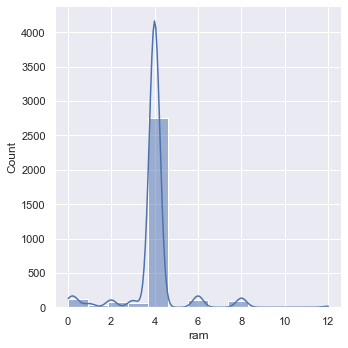

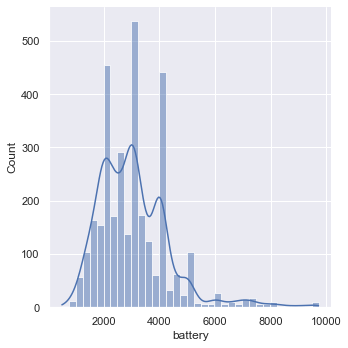

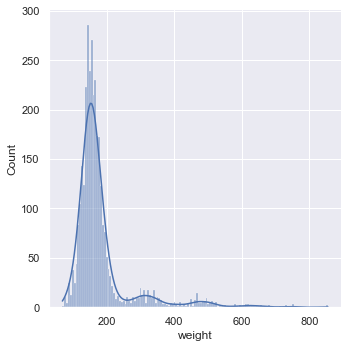

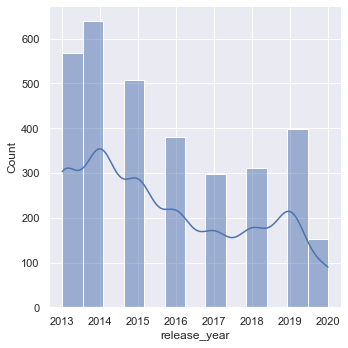

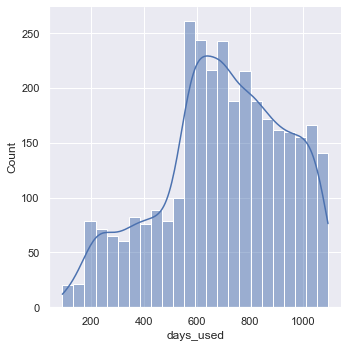

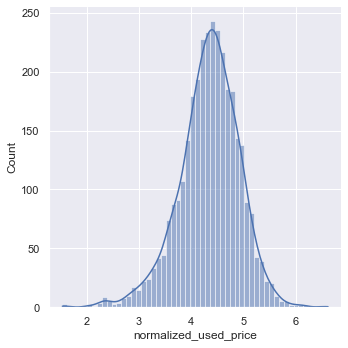

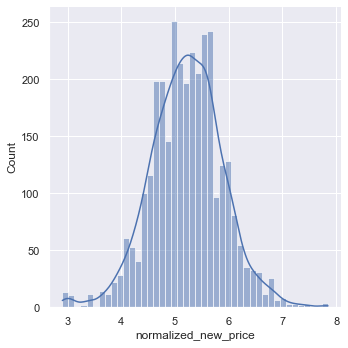

In [70]:
#Explore PDF

# sns.displot(data_no_mv['normalized_used_price'],kde=True)

for i in data_no_mv.columns:
    sns.displot(data_no_mv[i],kde=True)

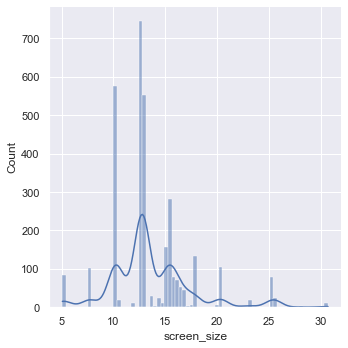

In [27]:
sns.displot(data_no_mv['screen_size'],kde=True)


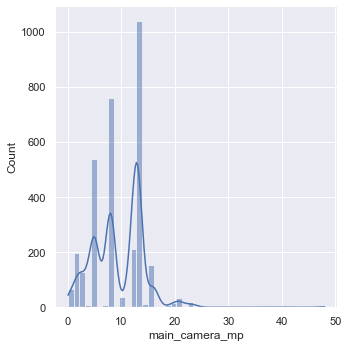

In [28]:
sns.displot(data_no_mv['main_camera_mp'],kde=True)

## Dealing with Outliers

In [47]:
data_no_mv['int_memory'].value_counts()


16.00      1278
32.00      1042
64.00       455
128.00      297
256.00       69
512.00       44
0.10         16
0.06         14
8.00         12
4.00         10
1024.00       8
0.50          4
0.20          2
24.00         1
0.01          1
Name: int_memory, dtype: int64

In [48]:
data_m =data_no_mv.query('int_memory == 512 | int_memory == 16 | int_memory == 32 | int_memory == 64 | int_memory == 1024  |int_memory == 128 | int_memory == 256')

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_memory', ylabel='count'>

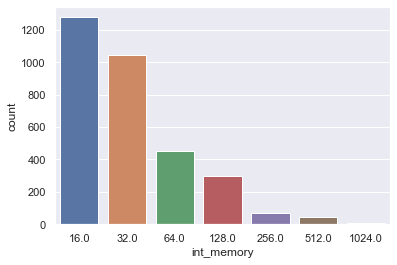

In [54]:
sns.countplot(data_m['int_memory'])

In [56]:
raw_data.query('int_memory == 1024 ')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
644,Apple,iOS,30.71,yes,no,12.00,7.0,1024.0,4.0,9720.0,631.0,2018,543,5.808022,7.003847
645,Apple,iOS,27.94,yes,no,12.00,7.0,1024.0,4.0,7812.0,468.0,2018,525,6.158969,6.778899
772,Asus,Android,12.70,no,no,8.00,0.3,1024.0,4.0,2500.0,160.0,2014,860,3.523120,4.594413
791,Asus,Android,10.34,no,no,13.00,1.2,1024.0,4.0,1820.0,126.0,2014,772,5.494953,5.555012
1468,Lava,Android,10.16,no,no,2.00,0.3,1024.0,4.0,1400.0,113.0,2013,595,2.978077,3.934958
1940,Micromax,Android,10.08,no,no,3.15,0.3,1024.0,4.0,1450.0,118.0,2013,836,3.437208,4.503912
2251,Others,Android,12.70,no,no,5.00,0.3,1024.0,4.0,2200.0,170.0,2013,584,4.070905,5.135798
2355,Samsung,Android,15.34,yes,no,12.00,9.0,1024.0,4.0,4100.0,175.0,2019,291,5.569718,6.957269


In [58]:
data_m['main_camera_mp'].value_counts()

13.00    1033
8.00      748
5.00      531
12.00     189
16.00     154
2.00      141
3.15      118
0.30       53
10.50      30
1.30       24
21.00      19
23.00      19
20.70      14
14.50      13
20.00      13
4.00       10
12.20      10
12.30       9
19.00       8
8.10        7
10.00       6
13.10       6
24.00       5
12.50       4
48.00       4
6.50        4
6.70        4
3.00        3
21.20       2
21.50       1
1.20        1
16.30       1
22.60       1
18.00       1
12.60       1
20.10       1
41.00       1
20.20       1
1.00        1
0.08        1
22.50       1
Name: main_camera_mp, dtype: int64

In [59]:
data_mp =data_m.query('main_camera_mp >=8.0')

In [61]:
data_mp['ram'].value_counts()

4.00     1986
6.00      101
8.00       83
2.00       56
3.00       53
1.00       11
12.00      10
0.25        2
Name: ram, dtype: int64

In [75]:
data_clean = data_mp[data_mp['ram']>=2.0]

In [76]:
 data_clean['4g']= data_clean['4g'].map({'yes':1,'no':0})

/var/folders/st/9f5h92v13m3fp3hf8zx6tbpm0000gn/T/ipykernel_90294/3728199444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['4g']= data_clean['4g'].map({'yes':1,'no':0})


In [80]:
 data_clean['5g']= data_clean['5g'].map({'yes':1,'no':0})

/var/folders/st/9f5h92v13m3fp3hf8zx6tbpm0000gn/T/ipykernel_90294/326166849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['5g']= data_clean['5g'].map({'yes':1,'no':0})


In [81]:
 data_clean

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,iOS,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,Android,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Android,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Android,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [82]:
new_data = data_clean.reset_index()

In [85]:
new_data =new_data.drop(['weight'],axis=1)

In [86]:
new_data.describe()

,index,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price
count,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.00000,2289.000000,2289.000000
mean,1781.913499,14.058615,0.820009,0.033202,11.843381,7.935343,52.990826,4.196156,3312.288117,2016.310179,667.97772,4.549351,5.442214
std,989.595707,3.066171,0.384264,0.179204,3.561770,6.845970,71.779994,1.057963,1190.048286,2.073367,239.39055,0.434443,0.556071
min,0.000000,5.080000,0.000000,0.000000,8.000000,0.300000,16.000000,2.000000,800.000000,2013.000000,91.00000,2.052841,3.057298
25%,978.000000,12.700000,1.000000,0.000000,8.000000,5.000000,16.000000,4.000000,2500.000000,2015.000000,516.00000,4.245491,5.066133
50%,1794.000000,12.830000,1.000000,0.000000,13.000000,5.000000,32.000000,4.000000,3020.000000,2016.000000,674.00000,4.518086,5.416589
75%,2679.000000,15.320000,1.000000,0.000000,13.000000,8.000000,64.000000,4.000000,4000.000000,2018.000000,852.00000,4.830152,5.768633
max,3453.000000,30.710000,1.000000,1.000000,48.000000,32.000000,1024.000000,12.000000,9720.000000,2020.000000,1094.00000,6.619433,7.847841


## Checking the  OLS assumptions



In [90]:
col = ['index', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'release_year',
       'days_used','normalized_new_price']

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='normalized_new_price', ylabel='normalized_used_price'>

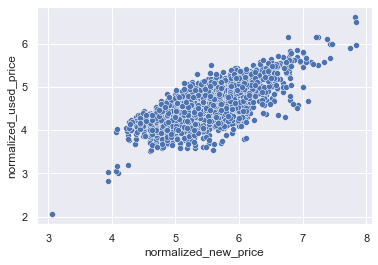

In [102]:
sns.scatterplot(new_data['normalized_new_price'],new_data['normalized_used_price'])

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='release_year', ylabel='normalized_used_price'>

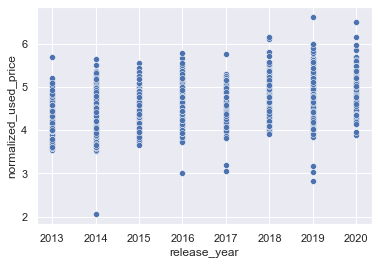

In [103]:
sns.scatterplot(new_data['release_year'],new_data['normalized_used_price'])

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='battery', ylabel='normalized_used_price'>

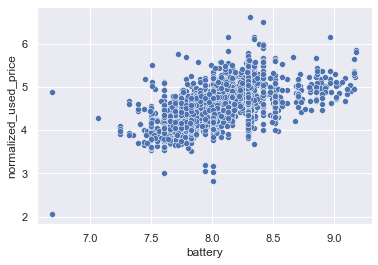

In [104]:
sns.scatterplot(np.log(new_data['battery']),new_data['normalized_used_price'])

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_used', ylabel='normalized_used_price'>

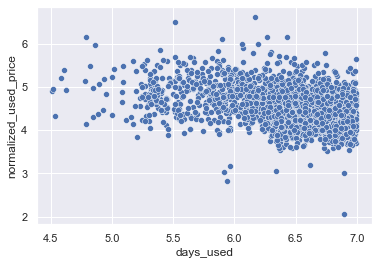

In [148]:
sns.scatterplot(np.log(new_data['days_used']),new_data['normalized_used_price'])

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='release_year', ylabel='normalized_used_price'>

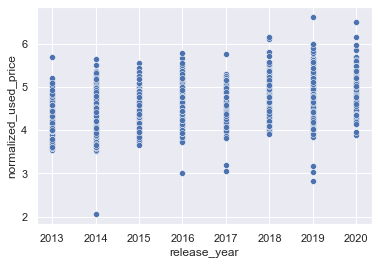

In [109]:
sns.scatterplot(new_data['release_year'],new_data['normalized_used_price'])

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ram', ylabel='normalized_used_price'>

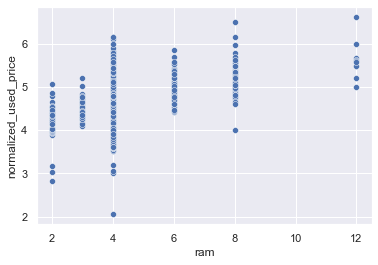

In [110]:

sns.scatterplot(new_data['ram'],new_data['normalized_used_price'])

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_memory', ylabel='normalized_used_price'>

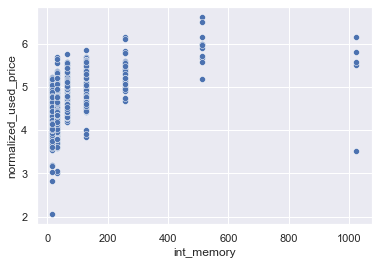

In [111]:

sns.scatterplot(new_data['int_memory'],new_data['normalized_used_price'])

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selfie_camera_mp', ylabel='normalized_used_price'>

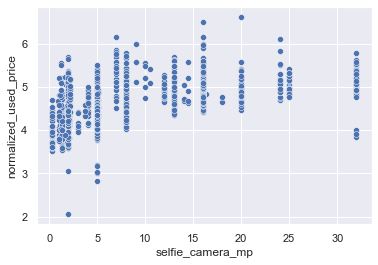

In [112]:

sns.scatterplot(new_data['selfie_camera_mp'],new_data['normalized_used_price'])

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='5g', ylabel='normalized_used_price'>

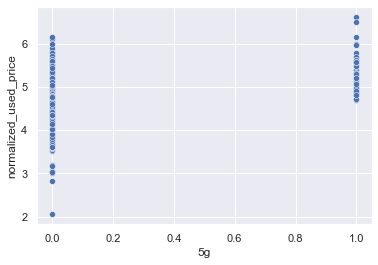

In [114]:
sns.scatterplot(new_data['5g'],new_data['normalized_used_price'])

In [320]:

#  ['index', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
#        'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'release_year',
#        'days_used','normalized_new_price']

from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = new_data[['days_used','normalized_new_price']]
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable.values,i) for i in range(variable.shape[1])]
vif['features'] = variable.columns

In [321]:
vif

,VIF,features
0,7.576628,days_used
1,7.576628,normalized_new_price


#Linearity

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


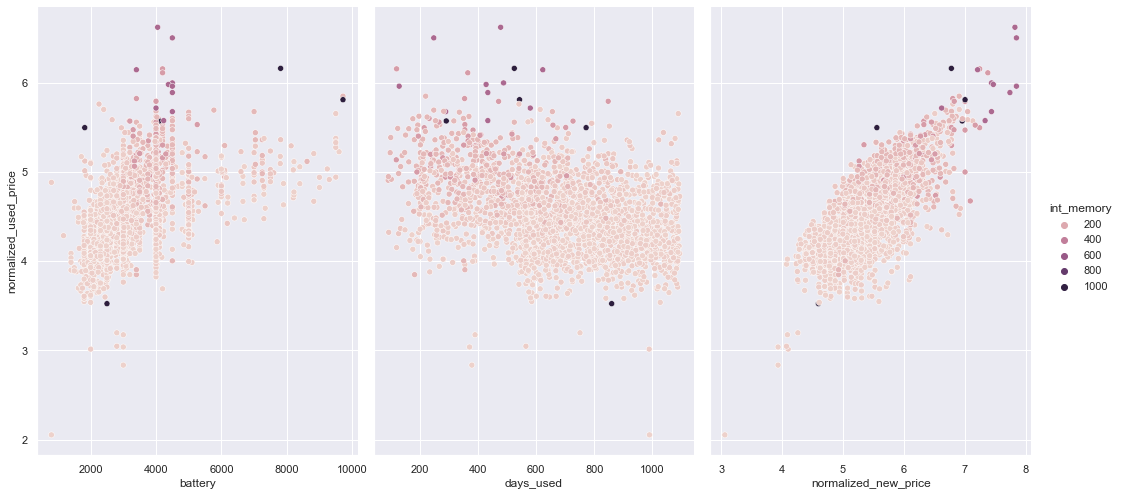

In [356]:
# p = sns.pairplot(raw_data) 'battery','days_used','int_memory''days_used','normalized_new_price'

p = sns.pairplot(new_data, x_vars=['battery','days_used','normalized_new_price'], y_vars='normalized_used_price',hue='int_memory', size=7, aspect=0.7)


## Remove  multicollinearity

In [341]:
data_no_multicollinearity =new_data.drop(["release_year","index"],axis=1)
data_no_multicollinearity

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100
1,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018
2,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631
3,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,345,5.135387,5.630961
4,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...
2284,iOS,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,208,5.100902,6.287933
2285,Android,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,541,5.037732,6.251538
2286,Android,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,201,4.357350,4.528829
2287,Android,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,149,4.349762,4.624188


## Create Dummmy data for categorical data

In [342]:
data_with_dummy = pd.get_dummies(data_no_multicollinearity,drop_first=True)

## Rearrange Data 

In [343]:
data_with_dummy.columns.values

array(['screen_size', '4g', '5g', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'days_used',
       'normalized_used_price', 'normalized_new_price', 'os_Others',
       'os_Windows', 'os_iOS'], dtype=object)

In [344]:
data_preprocess = data_with_dummy

In [345]:
data_preprocess

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,os_Others,os_Windows,os_iOS
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,0,0,0
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,0,0,0
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,0,0,0
3,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,345,5.135387,5.630961,0,0,0
4,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,208,5.100902,6.287933,0,0,1
2285,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,541,5.037732,6.251538,0,0,0
2286,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,201,4.357350,4.528829,0,0,0
2287,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,149,4.349762,4.624188,0,0,0


## Linear Regression Model

#### Declear input and target 

In [346]:
target = data_preprocess['normalized_used_price']
inputs = data_preprocess.drop(['normalized_used_price'],axis=1)

## Scale Data

In [347]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(inputs)
input_scaler = sc.transform(inputs)

In [348]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_scaler,target,random_state = 0,test_size=0.25)

In [349]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


In [350]:
regr.score(X_train,y_train)

0.7510091062035921

In [351]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.2271517755421217e-16


## Check for Homoscedasticity

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


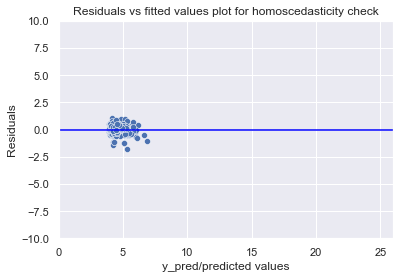

In [339]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

/Users/eniolaajani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


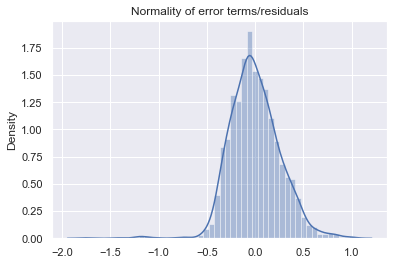

In [340]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# find the weight and bias

In [352]:
regr.intercept_

4.552340392352258

In [353]:
regr.coef_

array([ 0.08655048,  0.02890655,  0.00342059,  0.06723227,  0.09507927,
        0.04475172,  0.02421427,  0.02595772, -0.00668768,  0.19730879,
       -0.00238454,  0.0046297 ,  0.0013769 ])

In [354]:
regr_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
regr_summary['Weight'] = regr.coef_
regr_summary

,Features,Weight
0,screen_size,0.086550
1,4g,0.028907
2,5g,0.003421
3,main_camera_mp,0.067232
4,selfie_camera_mp,0.095079
5,int_memory,0.044752
6,ram,0.024214
7,battery,0.025958
8,days_used,-0.006688
9,normalized_new_price,0.197309
